# Flight Price Prediction
#### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Importing necessary libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing algorithms
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# importing ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

# Metrics and model selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV




### Loading Dataset

#### Size of training set: 10683 records ,                                                              Size of test set: 2671 records

In [2]:
train= pd.read_excel("Data_Train.xlsx",parse_dates=["Date_of_Journey"])
# Reading top 5 rows
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test= pd.read_excel("test_set.xlsx",parse_dates=["Date_of_Journey"])
# Reading top 5 rows
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
# checking the rows and columns of training dataset
print("Training dataset contains {} rows and {} columns.".format(len(train),len(train.columns)))

print()

# checking the rows and columns of testing dataset
print("Testing dataset contains {} rows and {} columns.".format(len(test),len(test.columns)))

Training dataset contains 10683 rows and 11 columns.

Testing dataset contains 2671 rows and 10 columns.


In [5]:
# checking Training  columns
print(train.columns)

print("\n")

# checking testing columns
print(test.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


#### FEATURES:
* Airline: The name of the airline.

* Date_of_Journey: The date of the journey

* Source: The source from which the service begins.

* Destination: The destination where the service ends.

* Route: The route taken by the flight to reach the destination.

* Dep_Time: The time when the journey starts from the source.

* Arrival_Time: Time of arrival at the destination.

* Duration: Total duration of the flight.

* Total_Stops: Total stops between the source and destination.

* Additional_Info: Additional information about the flight

* Price: The price of the ticket

In [6]:
# Let's check training data type
print(train.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object


In [7]:
# Let's check testing data type
test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

###### Except Price feature in training dataset ,all other columns in both training and testing dataset are categorical in nature.

In [8]:
# Let's check full information about our trainig data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


###### 1 integer and 10 object data types in training dataset.

In [9]:
# Let's check full information about our testing data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   object        
 6   Arrival_Time     2671 non-null   object        
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 208.8+ KB


###### Out of 10 columns in testing dataset all are object datatypes.

In [10]:
# Checking null values

if train.isnull().sum().any()==True:
    print("Null values present in training dataset")
else:
    print("There is no null values in training dataset")
    
print()

if test.isnull().sum().any()==True:
    print("Null values present in testing dataset")
else:
    print("There is no null values in testing dataset")

Null values present in training dataset

There is no null values in testing dataset


In [11]:
# Checking null values in training dataset
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### 2 columns contains 1 null values each.

In [12]:
# Let's check the duplicate values in training data
if train.duplicated().sum().any()==True:
    print("Training data contains duplicate values")
else:
    print("There are no duplicate values in Training data")
    
print("\n")

# Let's check the duplicate values in testing data
if test.duplicated().sum().any()==True:
    print("Testing data contains duplicate values")
else:
    print("There are no duplicate values in testing data")

Training data contains duplicate values


Testing data contains duplicate values


In [13]:
# Removing duplicates values from training dataset.

train.drop_duplicates(keep='first',inplace=True)

In [14]:
# Removing duplicates values from testing dataset.

test.drop_duplicates(keep='first',inplace=True)

In [15]:
#  After removing duplicates checking the rows and columns of training dataset
print("After duplicates removal training dataset contains {} rows and {} columns.".format(len(train),len(train.columns)))

print()

#  After removing duplicates checking the rows and columns of testing dataset
print("After duplicates removal testing dataset contains {} rows and {} columns.".format(len(test),len(test.columns)))

After duplicates removal training dataset contains 10463 rows and 11 columns.

After duplicates removal testing dataset contains 2645 rows and 10 columns.


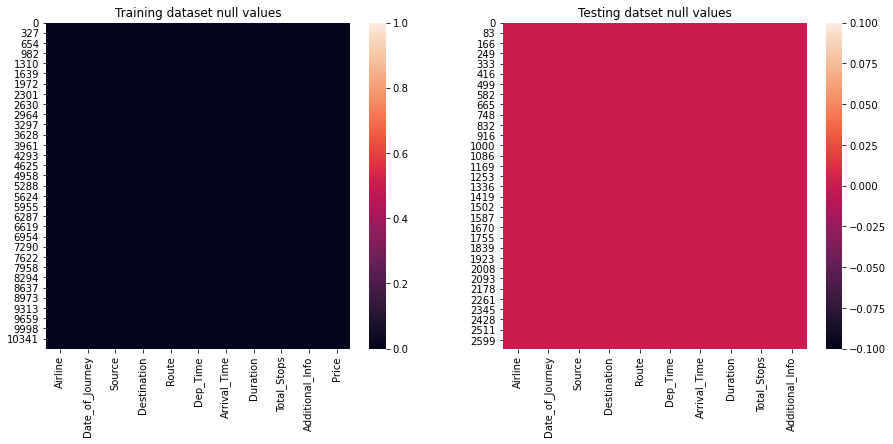

In [16]:
# checking heatmap for null values

f=plt.figure(figsize=(15,6))
f.add_subplot(1,2,1)
sns.heatmap(train.isnull())
plt.title("Training dataset null values")

f.add_subplot(1,2,2)
sns.heatmap(test.isnull())
plt.title("Testing datset null values")
plt.show()

###### Black graph in training dataset shows that there are missing values in training dataset, as we also know there are 2 missing values in 2 columns ,while the red graph of testing dataset shows that there are no null values in it.

In [17]:
# Let's check training features description
train.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


###### There is skewness in Price feature, but this is our target feature there is no need of treating this.

### Data Cleaning

In [18]:
# Removing null values from training dataset.
train[train['Route'].isna()]

# both nan values of 2 different columns are present in same row.So we can drop it.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [19]:
# Dropping nan values by index
train.drop(index=train[train['Route'].isna()].index,axis=0,inplace=True)

In [20]:
# Checking null values dropped or not
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [21]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
print(train['Airline'].value_counts())
print()
print(test['Airline'].value_counts())

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, d

Text(0.5, 1.0, 'Test data')

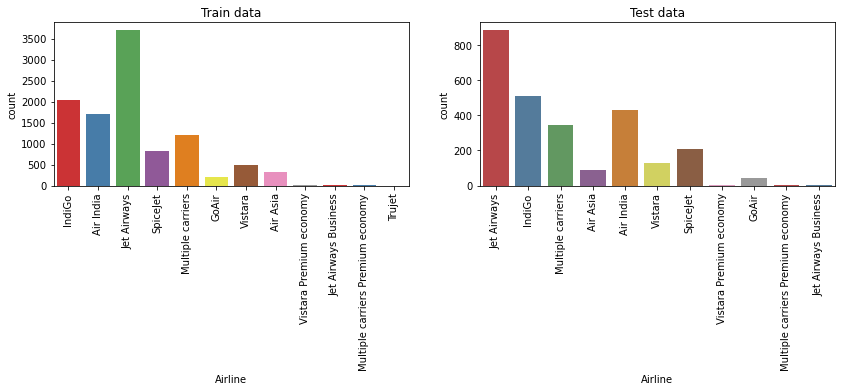

In [24]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x='Airline',data=train,palette='Set1')
plt.xticks(rotation=90)
plt.title("Train data")

f.add_subplot(1,2,2)
sns.countplot(x='Airline',data=test,palette='Set1',saturation=0.55)
plt.xticks(rotation=90)
plt.title("Test data")

###### Jet airways ,Indigo,Air India are most used flights while Jet Airways Business,Vistara Premium,Multiple carriers Premium are the least used flights.

Text(0.5, 1.0, 'Train data')

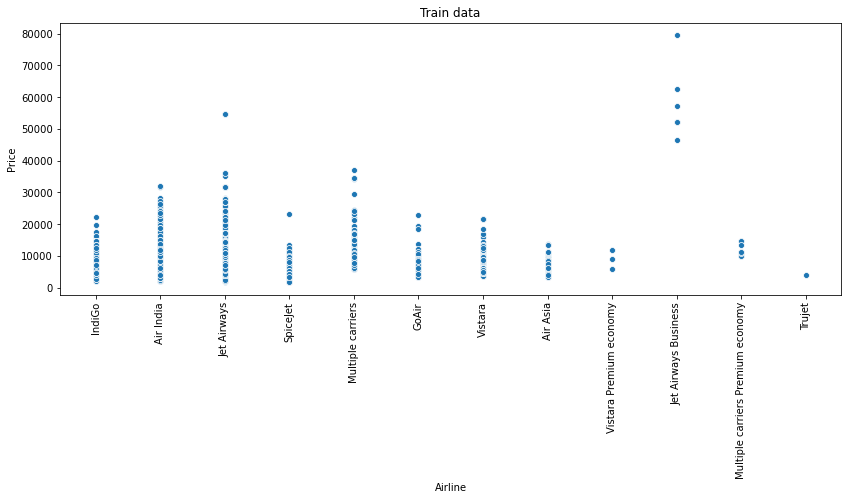

In [25]:
f=plt.figure(figsize=(14,5))

sns.scatterplot(x='Airline',data=train,y='Price',palette='Set1')
plt.xticks(rotation=90)
plt.title("Train data")

###### Jet Airways with business class is charging hishest price among all while spicejet and Truject are charging least among all.

In [26]:
# let's do cleaning of Airline feature

# Train data
train['Airline'].replace({'Multiple carriers Premium economy':"other","Jet Airways Business":"other","Vistara Premium economy":"other","Trujet":"other"},inplace=True)

#Test Data
test['Airline'].replace({'Multiple carriers Premium economy':"other","Jet Airways Business":"other","Vistara Premium economy":"other"},inplace=True)

In [27]:
train['Airline'].value_counts()

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
GoAir                 194
other                  23
Name: Airline, dtype: int64

In [28]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
# Cleaning date_of_journey feature from training data
train['Journey_day']=train['Date_of_Journey'].apply(lambda x:x.day)
train['Journey_month']=train['Date_of_Journey'].apply(lambda x:x.month)
train['Journey_year']=train['Date_of_Journey'].apply(lambda x:x.year)

# Cleaning date_of_journey feature from testing data
test['Journey_day']=test['Date_of_Journey'].apply(lambda x:x.day)
test['Journey_month']=test['Date_of_Journey'].apply(lambda x:x.month)
test['Journey_year']=test['Date_of_Journey'].apply(lambda x:x.year)

In [30]:
# Drpping date_of_journey feature
train.drop('Date_of_Journey',axis=1,inplace=True)
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [31]:
# Drpping date_of_journey feature
test.drop('Date_of_Journey',axis=1,inplace=True)
test.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019


In [32]:
print(train['Journey_day'].unique())
print(train['Journey_month'].unique())
print(train['Journey_year'].unique())

[24  5  6  3 27 18 15 21  4]
[ 3  1  9 12  6  5  4]
[2019]


In [33]:
#Cheking uniue values
print(test['Journey_day'].unique())
print(test['Journey_month'].unique())
print(test['Journey_year'].unique())

[ 6  5 21 24  3 15 18  4 27]
[ 6 12  5  1  3  9  4]
[2019]


In [34]:
# Let's drop the journey year as there is only 2019 year in data.
train.drop('Journey_year',axis=1,inplace=True)

test.drop('Journey_year',axis=1,inplace=True)

Text(0.5, 1.0, 'Test data')

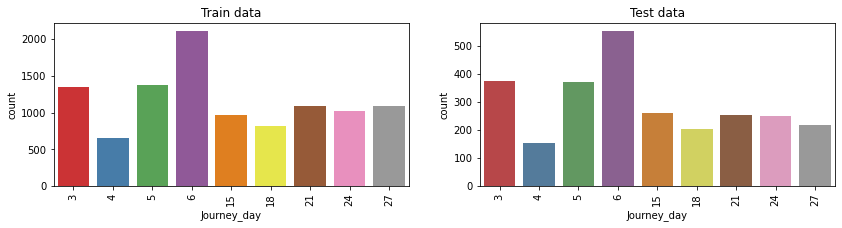

In [35]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x='Journey_day',data=train,palette='Set1')
plt.xticks(rotation=90)
plt.title("Train data")

f.add_subplot(1,2,2)
sns.countplot(x='Journey_day',data=test,palette='Set1',saturation=0.55)
plt.xticks(rotation=90)
plt.title("Test data")

Text(0.5, 1.0, 'Test data')

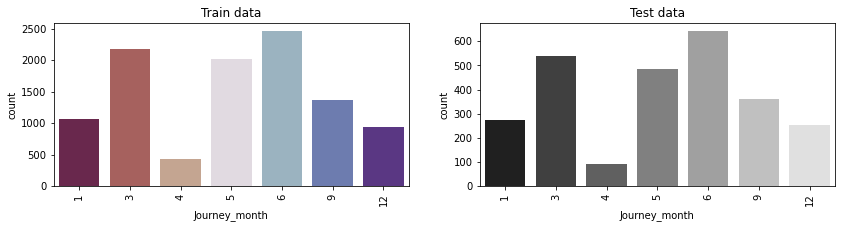

In [36]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x='Journey_month',data=train,palette='twilight_shifted_r')
plt.xticks(rotation=90)
plt.title("Train data")

f.add_subplot(1,2,2)
sns.countplot(x='Journey_month',data=test,palette='gist_yarg_r',saturation=0.55)
plt.xticks(rotation=90)
plt.title("Test data")

Text(0.5, 1.0, 'Test data')

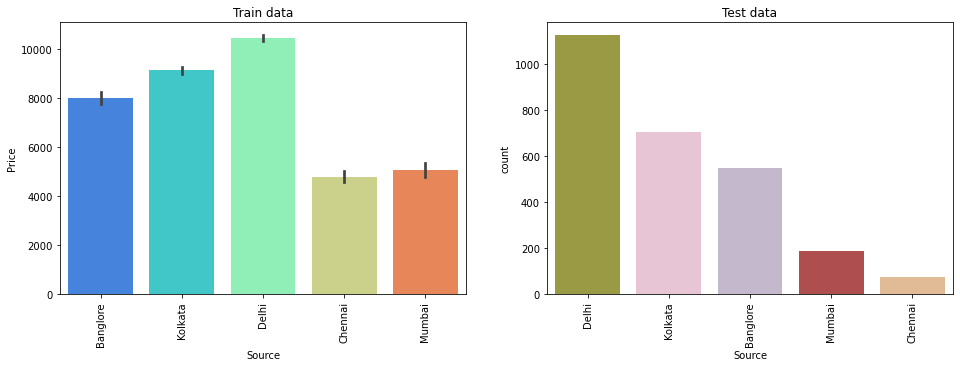

In [37]:
f=plt.figure(figsize=(16,5))
f.add_subplot(1,2,1)
sns.barplot(x='Source',y='Price',data=train,palette='rainbow')
plt.xticks(rotation=90)
plt.title("Train data")

f.add_subplot(1,2,2)
sns.countplot(x='Source',data=test,palette='tab20_r',saturation=0.55)
plt.xticks(rotation=90)
plt.title("Test data")

###### Maximum flights are taken from Delhi and Kolkata ,while Delhi is charging high price then kolkata.

Text(0.5, 1.0, 'Test data')

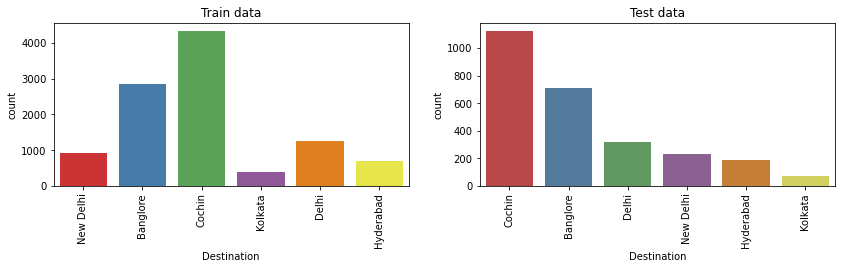

In [38]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x='Destination',data=train,palette='Set1')
plt.xticks(rotation=90)
plt.title("Train data")

f.add_subplot(1,2,2)
sns.countplot(x='Destination',data=test,palette='Set1',saturation=0.55)
plt.xticks(rotation=90)
plt.title("Test data")

In [39]:

#Replacing the value 'New Delhi' in the datasets with 'Delhi' as both are the same cities

train['Destination']=train['Destination'].replace('New Delhi', 'Delhi')
test['Destination']=test['Destination'].replace('New Delhi', 'Delhi')

In [40]:
# Cleaning Dep_Time feature

# Training dataset
train['dep_hr']=pd.to_datetime(train['Dep_Time']).dt.hour
train['dep_min']=pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time',axis=1,inplace=True)

#Testing dataset
test['dep_hr']=pd.to_datetime(test['Dep_Time']).dt.hour
test['dep_min']=pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time',axis=1,inplace=True)

In [41]:
train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


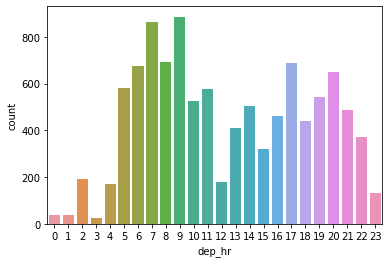

In [42]:
sns.countplot(train['dep_hr'])

###### More flights are taking off at the morning and evening time.

In [43]:
test.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hr,dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20


In [44]:
# Cleaning Arrival_Time feature

# Training dataset
train['arival_hr']=pd.to_datetime(train['Arrival_Time']).dt.hour
train['arival_min']=pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time',axis=1,inplace=True)

#Testing dataset
test['arival_hr']=pd.to_datetime(test['Arrival_Time']).dt.hour
test['arival_min']=pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time',axis=1,inplace=True)

In [45]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


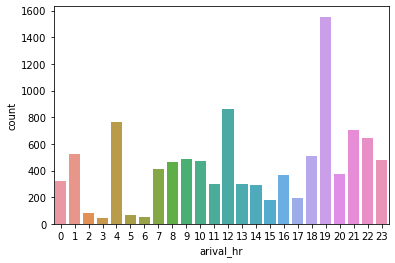

In [46]:
sns.countplot(train['arival_hr'])

In [47]:
# Cleaning Duration feature

# Train data
train['Duration']=train['Duration'].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

# Test data
test['Duration']=test['Duration'].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

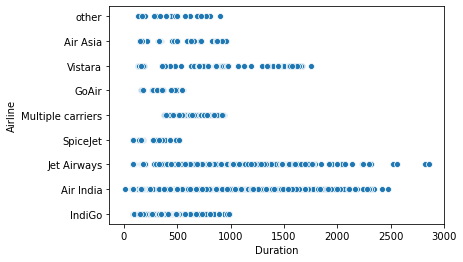

In [48]:
sns.scatterplot(x=train['Duration'],y=train['Airline'])

In [49]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15


In [50]:
# Total_stops feature

print(train['Total_Stops'].unique())
print()
print(test['Total_Stops'].unique())


['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']

['1 stop' 'non-stop' '2 stops' '3 stops' '4 stops']


In [51]:
# Cleaning Total_stops feature

# Train
train['Total_Stops'].replace({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4},inplace=True)

# Test
test['Total_Stops'].replace({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4},inplace=True)

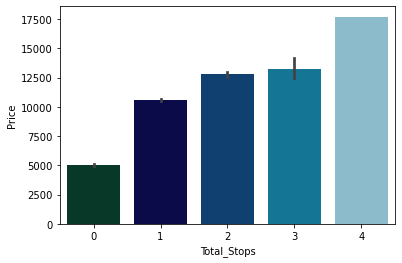

In [52]:
sns.barplot(x=train['Total_Stops'],y=train['Price'],palette='ocean')

###### There si high price if there are more stops in between travel.

In [53]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15


Text(0, 0.5, 'Price of ticket')

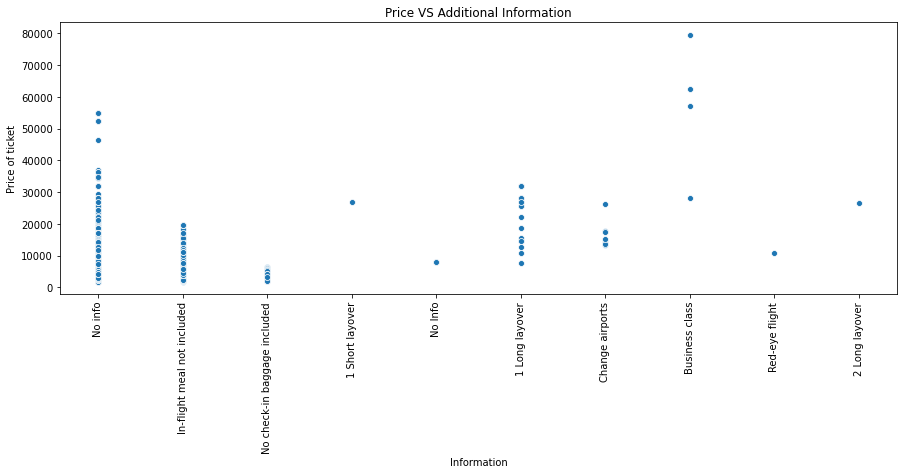

In [54]:
plt.figure(figsize = (15, 5))
plt.title('Price VS Additional Information')
sns.scatterplot(train['Additional_Info'], train['Price'],data=train)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

###### Business class with high prices,while no check-in baggage is with lowest price.

In [55]:
# Addition_info feature
print(train['Additional_Info'].value_counts())
print()
print(test['Additional_Info'].value_counts())


No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64


In [56]:
# cleaning Additonal_info feature

# Train
train['Additional_Info'].replace({'No Info':'No info','1 Long layover':'other','Change airports':'other','Business class':'other','1 Short layover':'other','2 Long layover':'other','Red-eye flight':'other'},inplace=True)

# Test
test['Additional_Info'].replace({'1 Long layover':'other','Change airports':'other','Business class':'other'},inplace=True)

In [57]:
print(train['Additional_Info'].value_counts())
print()
print(test['Additional_Info'].value_counts())


No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
other                             33
Name: Additional_Info, dtype: int64

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
other                              3
Name: Additional_Info, dtype: int64


In [58]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15


In [60]:
train_categorical_features=[]
train_numerical_features=[]
for i in train.columns:
    if train[i].dtype=="object":
        train_categorical_features.append(i)
    else:
        train_numerical_features.append(i)

Skewness of Duration = 0.90
Skewness of Total_Stops = 0.33
Skewness of Price = 1.86
Skewness of Journey_day = 0.38
Skewness of Journey_month = 0.63
Skewness of dep_hr = 0.11
Skewness of dep_min = 0.17
Skewness of arival_hr = -0.38
Skewness of arival_min = 0.11


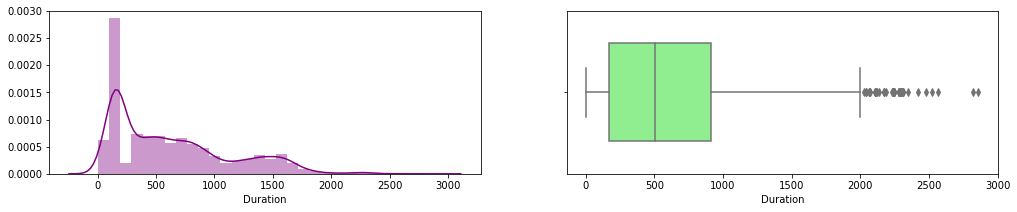

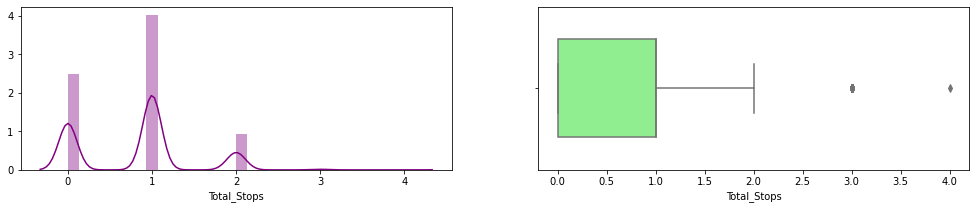

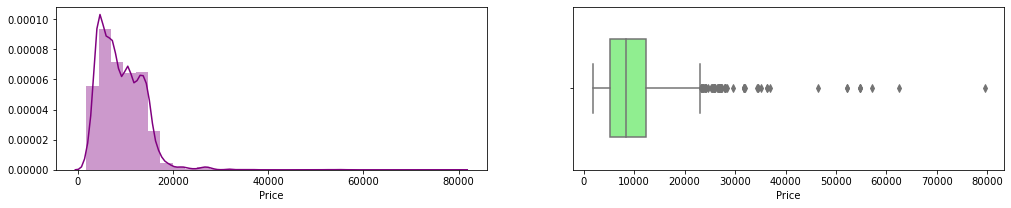

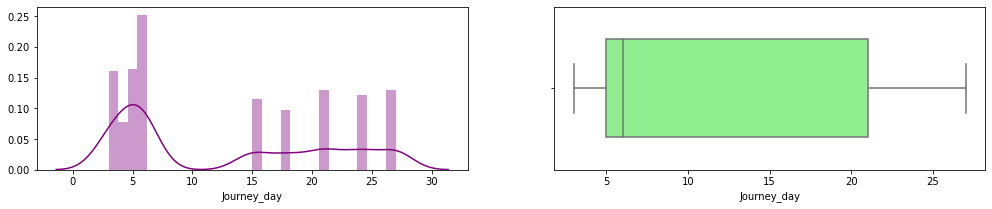

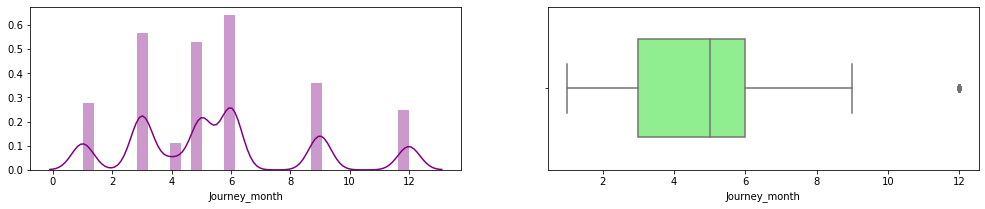

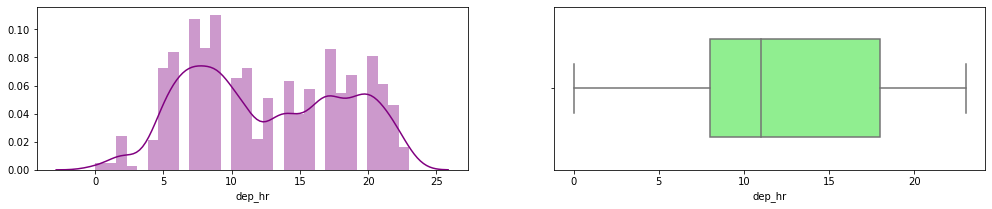

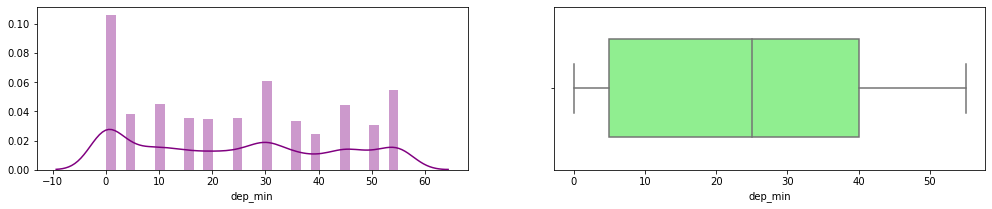

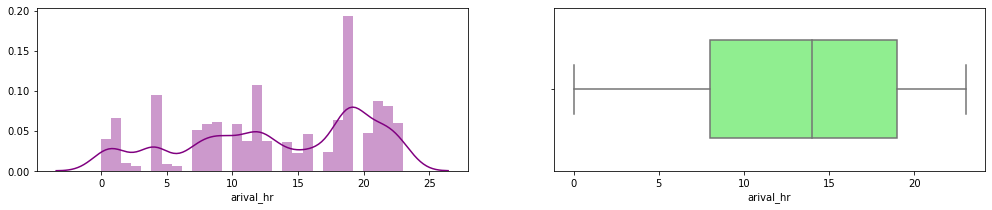

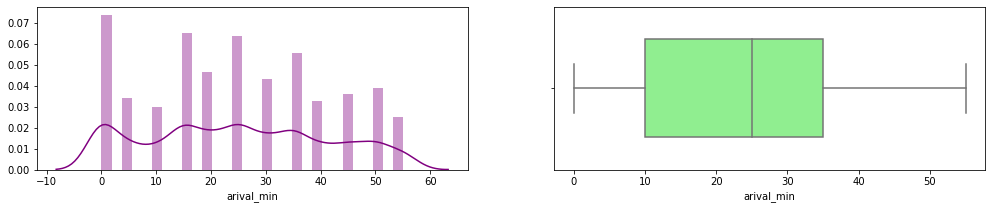

In [61]:
for i in train_numerical_features:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(train[i],bins=30,color='purple')
    f.add_subplot(1,2,2)
    sns.boxplot(train[i],color='lightgreen',saturation=1.5,
    width=0.6)
    print('Skewness of %s = %0.2f' %(i, train[i].skew()))

##### Skewness is present in Duration feature while Some columns are containing outliers also.

In [62]:
test_categorical_features=[]
test_numerical_features=[]
for i in test.columns:
    if test[i].dtype=="object":
        test_categorical_features.append(i)
    else:
        test_numerical_features.append(i)

Skewness of Duration = 0.91
Skewness of Total_Stops = 0.33
Skewness of Journey_day = 0.48
Skewness of Journey_month = 0.59
Skewness of dep_hr = 0.09
Skewness of dep_min = 0.13
Skewness of arival_hr = -0.45
Skewness of arival_min = 0.11


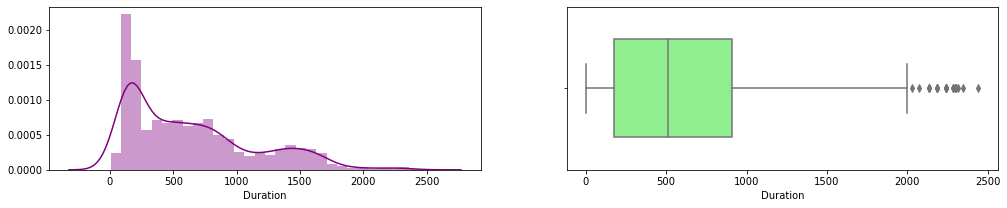

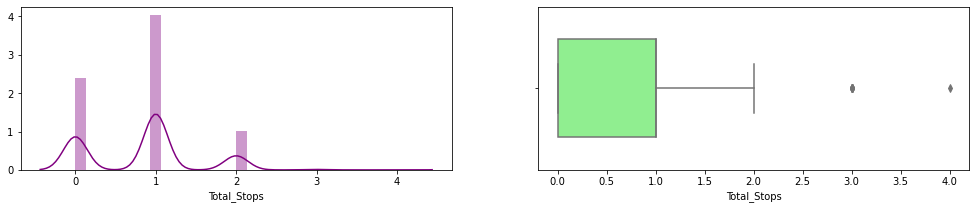

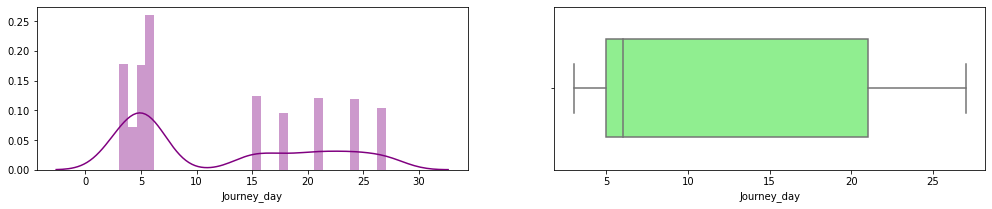

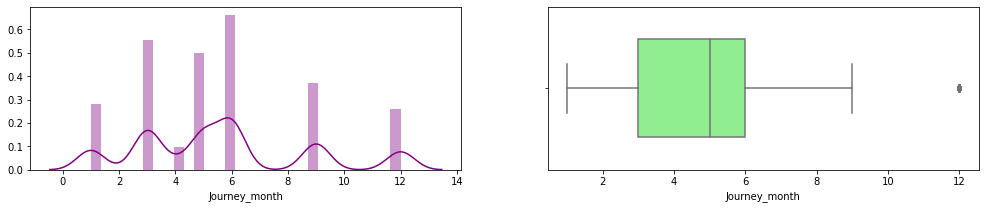

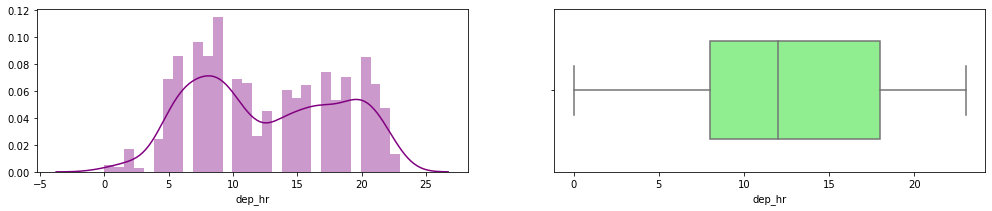

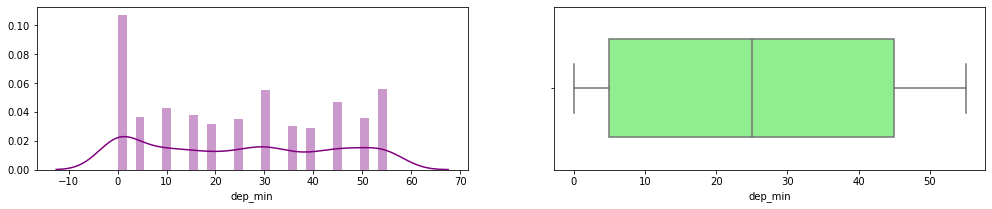

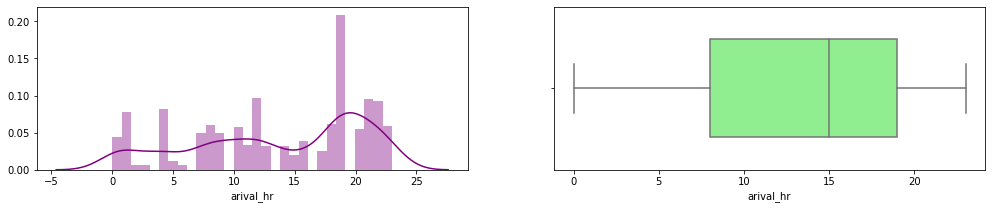

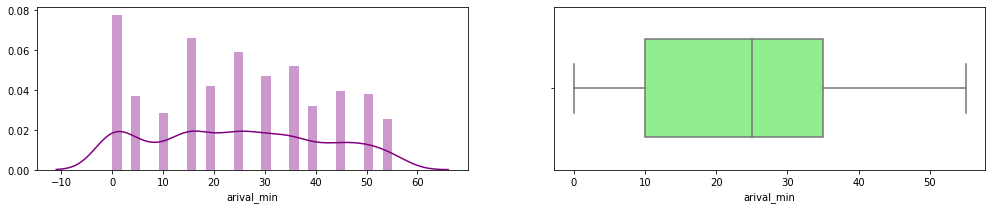

In [63]:
for i in test_numerical_features:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(test[i],bins=30,color='purple')
    f.add_subplot(1,2,2)
    sns.boxplot(test[i],color='lightgreen',saturation=1.5,
    width=0.6)
    print('Skewness of %s = %0.2f' %(i, test[i].skew()))

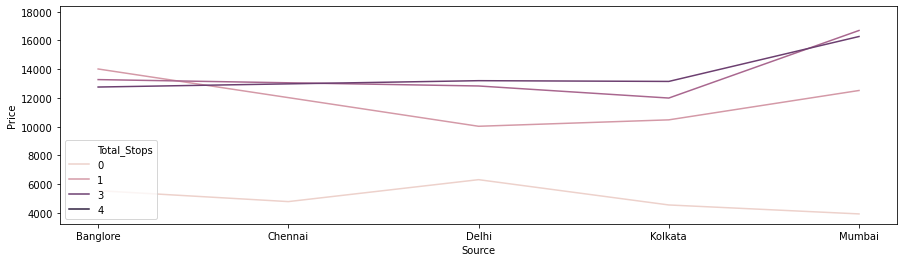

In [64]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Source',y='Price',hue='Total_Stops',data=train, ci=None)

Observation:

1. If Total stop is 0 than journey start from Delhi than ticket price is more than other sourses.
2. If Total stop is 0 than journey start from Mumbai than ticket price is less than other sourses.
3. If total stops more than 1 than ticket price is more than other source.

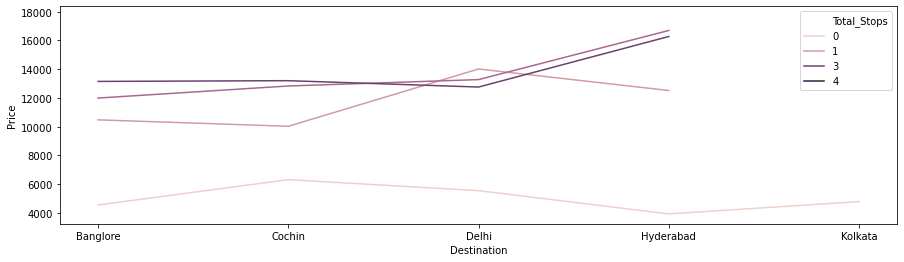

In [65]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Destination',y='Price',hue='Total_Stops',data=train, ci=None)

###### It can be seen that if flights are non-stops then cities with less price are charging high prices in flights other than non-stops flights.

Text(0, 0.5, '% of Stops')

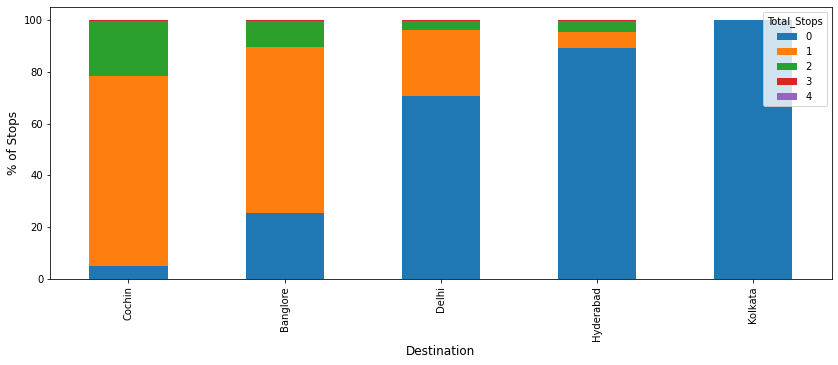

In [66]:
tbl=pd.crosstab(train['Destination'], train['Total_Stops'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Destination',fontsize=12)
plt.ylabel('% of Stops',fontsize=12)

###### In Destinatin Cochin is with the highest number of 1 and 2 stops  ,while non-stop flights are coming to Kolkata .

In [67]:
# Removing skewness from Duration feature
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

train[['Duration']]=pt.fit_transform(train[['Duration']])
test[['Duration']]=pt.fit_transform(test[['Duration']])

In [68]:
train.skew()

Duration        -0.038729
Total_Stops      0.332309
Price            1.857490
Journey_day      0.375990
Journey_month    0.630882
dep_hr           0.108306
dep_min          0.171301
arival_hr       -0.378978
arival_min       0.110802
dtype: float64

In [69]:
test.skew()

Duration        -0.046960
Total_Stops      0.329736
Journey_day      0.479218
Journey_month    0.589883
dep_hr           0.089146
dep_min          0.129932
arival_hr       -0.447350
arival_min       0.113229
dtype: float64

In [70]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in train.columns:
    if train[i].dtype=='object':
        train[i]=le.fit_transform(train[i])

In [71]:
for i in test.columns:
    if test[i].dtype=='object':
        test[i]=le.fit_transform(test[i])

In [72]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,3,0,2,18,-1.046443,0,2,3897,24,3,22,20,1,10
1,1,3,0,84,-0.029108,2,2,7662,5,1,5,50,13,15


In [73]:
test.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,4,2,1,76,0.384437,1,2,6,6,17,30,4,25
1,3,3,0,65,-0.718998,1,2,5,12,6,20,10,20


### Splitting independent and dependent features


In [74]:
train_x=train.drop('Price',axis=1)
train_y=train[['Price']]

In [75]:
print("Independent variabales shape - ",train_x.shape)
print("Dependent variables shape - ",train_y.shape)

Independent variabales shape -  (10462, 13)
Dependent variables shape -  (10462, 1)


In [76]:
features=train_x.columns

In [77]:
from sklearn.preprocessing import StandardScaler
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(train_x)

In [78]:
train_x=pd.DataFrame(x,columns=features)

In [79]:
train_x.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hr,dep_min,arival_hr,arival_min
0,-0.337768,-1.646877,0.804913,-1.533452,-1.046443,-1.214593,0.504825,1.293326,-0.846221,1.662578,-0.234123,-1.807045,-0.888367
1,-1.510789,0.882057,-1.152093,0.264633,-0.029108,1.813062,0.504825,-0.867922,-1.513956,-1.305841,1.360364,-0.056554,-0.586611


### Splitting training and testing data from train data

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_x,train_y,test_size=.3,random_state=42)

In [81]:
#Checking the shape

print(X_train.shape,'\t\t',X_test.shape)

(7323, 13) 		 (3139, 13)


In [82]:
#Checking the shape

print(Y_train.shape,'\t',Y_test.shape)

(7323, 1) 	 (3139, 1)


In [83]:
# function for checking best random state
def max_r2_score(reg,train_x,train_y):
    max_r2score=0
    for r_state in range(42,101):
        X_train,X_test,Y_train,Y_test=train_test_split(train_x,train_y,test_size=.3,random_state=42)
        reg.fit(X_train,Y_train)
        pred=reg.predict(X_test)
        r2score=r2_score(Y_test,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state

In [84]:
# Using GridSearchCV to select best parameter for the models
kn=KNeighborsRegressor()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gdk=GridSearchCV(kn,parameters)
gdk.fit(X_train,Y_train)
gdk.best_params_

{'n_neighbors': 3}

In [85]:
# Using GridSearchCV 
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(X_train,Y_train)
gdd.best_params_

{'criterion': 'mse'}

In [86]:
# Using GridSearchCV 
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(X_train,Y_train)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [87]:
# Using GridSearchCV
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(X_train,Y_train)
gdls.best_params_

{'alpha': 1}

In [88]:
# Using GridSearchCV 
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(X_train,Y_train)
grd.best_params_

{'alpha': 1}

In [89]:
# Using GridSearchCV 
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(X_train,Y_train)
gdrf.best_params_

{'n_estimators': 50}

In [90]:
# Using GridSearchCV 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(X_train,Y_train)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [91]:
# Using GridSearchCV 
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(X_train,Y_train)
gad.best_params_

{'learning_rate': 0.001, 'n_estimators': 50}

In [92]:
Lr=LinearRegression()
sv=SVR(C=10,kernel='linear')
dt=DecisionTreeRegressor(criterion='mse')
kn=KNeighborsRegressor(n_neighbors = 3)
ls=Lasso(alpha= 1)
rd=Ridge(alpha=1)
rf=RandomForestRegressor(n_estimators = 50)
ad=AdaBoostRegressor(learning_rate= 0.001, n_estimators= 50)
gb=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)

In [95]:
models=[]
models.append(('LinearRegression',Lr))
models.append(('SVR',sv))
models.append(('DecisionTreeRegressor',dt))
models.append(('KNeighborsRegressor',kn))
models.append(('Lasso',ls))
models.append(('Ridge',rd))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ad))
models.append(('GradientBoostingRegressor',gb))

In [96]:
Model=[]
score= []
mean_abs_e=[]
mean_sqr_e=[]
r2=[]
cv_score=[]
for name,model in models:
    print("~~~~~~~~******~~~~~~~~~~~",name,"~~~~~~~~~~******~~~~~~~~~~~~")
    
    Model.append(name)
    print("\n")
    model.fit(X_train,Y_train)
    print(model)
    sc=model.score(X_train,Y_train)
    print("Training score is -> ",sc*100)
    score.append(sc*100)
    pred=model.predict(X_test)
    mse=mean_squared_error(Y_test,pred)
    print("Root Mean squared error",np.sqrt(mse))
    mean_sqr_e.append(np.sqrt(mse))
    print("R2 score",r2_score(Y_test,pred))
    r2.append((r2_score(Y_test,pred))*100)
    soc=cross_val_score(model,train_x,train_y,cv=5).mean()
    print("Cross validation score",soc*100)
    cv_score.append(soc*100)
    print()

~~~~~~~~******~~~~~~~~~~~ LinearRegression ~~~~~~~~~~******~~~~~~~~~~~~


LinearRegression()
Training score is ->  46.93734211196209
Root Mean squared error 3298.2463454536705
R2 score 0.4762076283781639
Cross validation score 47.044370693521074

~~~~~~~~******~~~~~~~~~~~ SVR ~~~~~~~~~~******~~~~~~~~~~~~


SVR(C=10, kernel='linear')
Training score is ->  41.906518236172396
Root Mean squared error 3424.6613345834453
R2 score 0.4352863956093178
Cross validation score 42.369338859344346

~~~~~~~~******~~~~~~~~~~~ DecisionTreeRegressor ~~~~~~~~~~******~~~~~~~~~~~~


DecisionTreeRegressor()
Training score is ->  99.6958472812775
Root Mean squared error 2052.9850988315065
R2 score 0.7970614356710022
Cross validation score 80.37469341616779

~~~~~~~~******~~~~~~~~~~~ KNeighborsRegressor ~~~~~~~~~~******~~~~~~~~~~~~


KNeighborsRegressor(n_neighbors=3)
Training score is ->  88.09944176206868
Root Mean squared error 2440.644671085642
R2 score 0.713184841090008
Cross validation score 74.49796139

In [97]:
result = pd.DataFrame({'Model':Model,'Score':score,'R2_score':r2,'cross_val_score':cv_score})
result

,Model,Score,R2_score,cross_val_score
0,LinearRegression,46.937342,47.620763,47.044371
1,SVR,41.906518,43.528640,42.369339
2,DecisionTreeRegressor,99.695847,79.706144,80.374693
3,KNeighborsRegressor,88.099442,71.318484,74.497961
4,Lasso,46.937262,47.623356,47.044374
5,Ridge,46.937341,47.621326,47.044394
6,RandomForestRegressor,97.756272,88.914902,88.011213
7,AdaBoostRegressor,60.199625,59.082500,57.390131
8,GradientBoostingRegressor,91.573680,87.348982,86.695024


###### Comparing various algorithms ,we can clearly say that random forest regressor and gradientboosting regressor are giving better results. But here we can also see that the training score ,r2_score and cross_val_score of gradient boositing are far better in difference than randomforest_regressor. So we are using gradient_boosting_regressor for our model building.

In [98]:
max_r2_score(gb,train_x,train_y)

The maximum r2 score 0.8748172121936864 is achieved at r_state 55


55

In [99]:
# Using best random state
X_train,X_test,Y_train,Y_test=train_test_split(train_x,train_y,test_size=.3,random_state=55)
gb=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)
gb.fit(X_train,Y_train)
pred=gb.predict(X_test)
r2score=r2_score(Y_test,pred)
cv=cross_val_score(gb,train_x,train_y,cv=5,scoring='r2').mean()
print("The R2 score is", r2score)
print("The cross val score is", cv)

The R2 score is 0.8758346202639071
The cross val score is 0.8659118101439193


### Saving the file

In [100]:
import joblib
filename='gb_flight_price.obj'
joblib.dump(gb,filename)

['gb_flight_price.obj']

### Loading the model

In [101]:
model=joblib.load(filename)
model

GradientBoostingRegressor(n_estimators=500)

In [102]:
prediction=model.predict(test)
prediction

array([29508.00215054, 28934.25808707, 12126.89920734, ...,
       28967.03710839, 24551.7321432 , 29935.92614312])

### Conclusion

In [103]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,29508.002151
1,28934.258087
2,12126.899207
3,28775.301354
4,14103.805784
...,...
2640,25997.844955
2641,28726.882008
2642,28967.037108
2643,24551.732143


### Saving into csv file

In [104]:
prediction.to_csv('flight_prices.csv')